In [44]:
%load_ext autoreload
%autoreload 2
from MODM_Tool_Modules.TOPSIS_Modules import sensitivity_analysis_TOPSIS as sens
from MODM_Tool_Modules import gathering_data_function as gt
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_main_data_processing as tp_process
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_plotting_results_function as tp_plot
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_saving_results_function as tp_save

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following code snippet run a function that gathers all the necessary data to run the simulation.

1. Loads the Excel or CSV file into a dataframe.
2. User defines the beneficial or non-beneficial nature of all criteria.
3. User assigns a weight (1-10) for each criterion.
4. Normalizes the weights.

Argument:
    file_path (str) : path of the Excel or CSV file.

Returns:
    decision_matrix (dataframe) : data array containing all the alternatives and their evaluations for each criterion.
    data_filename (str) : name of the file.
    weights (dict) : 

In [80]:
decision_matrix, data_filename, weights, normalized_weights, beneficial_criteria, non_beneficial_criteria = gt.gathering_data(
    'C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/Tool/Data/data_input/optimal_pareto_points.csv')

       Profit (€/h)  Impact on Human Health (DALY/h) · 10  \
Point                                                       
1            566.37                                 2.474   
2           2701.83                                 2.496   
3           4223.16                                 2.518   
4           5381.57                                 2.539   
5           6091.79                                 2.561   
6           6221.99                                 2.583   
7           6271.55                                 2.605   
8           6272.59                                 2.626   
9           6273.62                                 2.648   
10          6274.65                                 2.670   
11          5843.28                                 2.640   
12          5324.84                                 2.624   
13          4575.07                                 2.606   
14          3815.92                                 2.594   
15          3002.12     

The following code snippet asks the user if he wants to save the results of the run and creates a new directory in the folder 'results' is the answer is 'yes'.

In [81]:
user_input = input(
    "Do you want to save the results of this run? (yes/no): ").strip().lower()
directory = None
if user_input == 'yes':
    directory = tp_save.directory_creation(data_filename)

The following code snippet processes the main calculations of the TOPSIS method.

In [82]:
ranked_alternatives, ranks, weighted_normalized_matrix, S = tp_process.TOPSIS_main_data_processing(
    decision_matrix, normalized_weights, beneficial_criteria)

The following code snippet plots the results of the run


Ranked Alternatives:
Point
5     0.924871
6     0.923352
7     0.917744
8     0.912468
9     0.906673
10    0.900408
11    0.885258
4     0.834678
12    0.818430
13    0.697293
3     0.640047
14    0.568234
15    0.428959
2     0.379804
16    0.298334
1     0.088552
dtype: float64


c:\Users\Virgi\OneDrive\Bureau\MODM_tool_project\Tool\Scripts\MODM_Tool_Modules\TOPSIS_Modules\TOPSIS_plotting_results_function.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x='Alternatives',


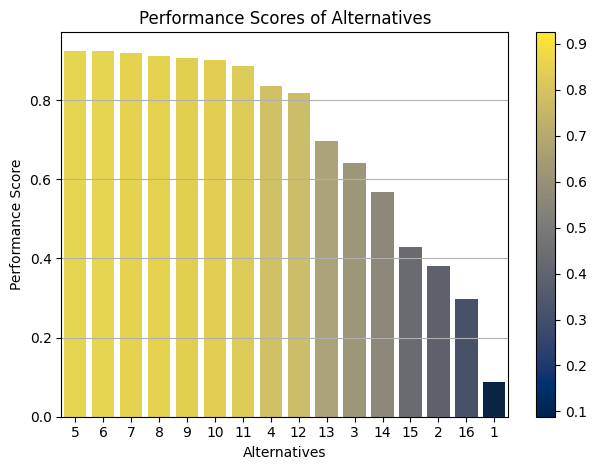

In [83]:
tp_plot.results_visualization_topsis(
    ranked_alternatives,
    weighted_normalized_matrix,
    beneficial_criteria,
    weights,
    normalized_weights,
    S,
    user_input,
    directory,
    decision_matrix)

Initial weight for Profit (€/h): 5
Initial weight for Impact on Human Health (DALY/h) · 10: 5
Initial weight for Impact on Ecosystems (species·yr/h) · 10^4: 5
Initial weight for Impact on Resources (USD2013/h) · 10^-4: 5


100%|██████████| 10000/10000 [00:50<00:00, 198.52it/s]


5
73.04


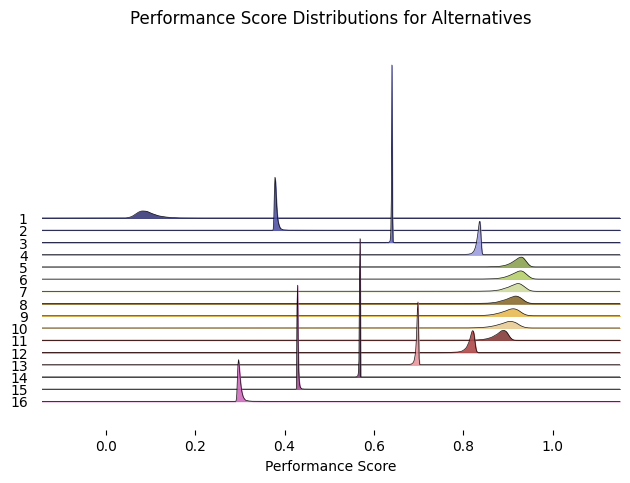

In [84]:
user_input2 = input(
    "Do you want to run a sensitivity analysis? (yes/no): ").strip().lower()
if user_input2 == 'yes':
    uncertainties, scores_df, ranks_df, reliability_percentage, initial_best_solution = sens.sensitivity_analysis(
        tp_process.TOPSIS_main_data_processing, weights, 10000, 0, 10, decision_matrix, beneficial_criteria, S, user_input, directory)

The following code snippet saves the results

In [85]:
if user_input == 'yes':
    tp_save.save_run_results(
        directory,
        decision_matrix,
        weighted_normalized_matrix,
        ranked_alternatives,
        weights,
        beneficial_criteria,
        non_beneficial_criteria,
    )
    
if user_input2 == 'yes' and user_input == 'yes':
    tp_save.save_sensitivity_results(
        directory,
        uncertainties,
        scores_df,
        ranks_df,
        reliability_percentage,
        initial_best_solution)

Run results saved in C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/Tool/Data/results/TOPSIS\ipykernel_launcher_optimal_pareto_points.csv_20231116_152420
Sensitivity analysis results saved in C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/Tool/Data/results/TOPSIS\ipykernel_launcher_optimal_pareto_points.csv_20231116_152420
